In [35]:
import sys

import matplotlib.pyplot as plt

%matplotlib notebook
%matplotlib notebook
## save variables
import pickle
## folder names
from glob import glob
## standard libraries
import numpy as np

#!{sys.executable} -m pip install tensorflow-gpu --user
#!{sys.executable} -m pip install keras --user
import tensorflow as tf
from keras import backend as k

import keras
from keras.optimizers import SGD, Adam
#!{sys.executable} -m pip install hyperas --user
#!{sys.executable} -m pip install networkx==1.11 --user

from hyperas import optim
from hyperas.distributions import choice, uniform, conditional
from hyperopt import Trials, STATUS_OK, tpe

import os.path
import datetime

from dependencies import models
from dependencies import functions

from functools import partial

# Creating dataset

In [31]:
#choose which dictionary to use
choice =        'logfilter' #'mfcc'#
useDelta =  True

data = {}

#retrieving of used values for the computation of mfcc
with open('variables/mfccValues.pkl', 'rb') as f:  
    values = pickle.load(f)
    
selected = 0

if choice == 'mfcc':
    for index in range(4):
        #name format of the selected data
        if useDelta:
            name = 'variables/mfccDictDD'+functions.getName(index)+'[nC='+str(values[selected][0])+' wL='+str(values[selected][2])+' wS='+str(values[selected][3])+'].pkl'
        else:
            name = 'variables/mfccDict'+functions.getName(index)+'[nC='+str(values[selected][0])+' wL='+str(values[selected][2])+' wS='+str(values[selected][3])+'].pkl'
        #loading in usedDict of the mfcc dict
        with open(name, 'rb') as f: 
            data[functions.getName(index)] = pickle.load(f)
        print('Loaded '+name)

elif choice == 'logfilter':
    for index in range(4):
        #name format of the selected data
        if useDelta:
            name = 'variables/logfiltDictDD'+functions.getName(index)+'[nF='+str(values[selected][1])+' wL='+str(values[selected][2])+' wS='+str(values[selected][3])+'].pkl'
        else:
            name = 'variables/logfiltDict'+functions.getName(index)+'[nF='+str(values[selected][1])+' wL='+str(values[selected][2])+' wS='+str(values[selected][3])+'].pkl'
        #saving in usedDict of the logfilter dict
        with open(name, 'rb') as f:  
            data[functions.getName(index)] = pickle.load(f)
        print('Loaded '+name)

Loaded variables/logfiltDictDDTrain[nF=26 wL=0.025 wS=0.01].pkl
Loaded variables/logfiltDictDDTest[nF=26 wL=0.025 wS=0.01].pkl
Loaded variables/logfiltDictDDValidation[nF=26 wL=0.025 wS=0.01].pkl
Loaded variables/logfiltDictDDAugmentedTrain[nF=26 wL=0.025 wS=0.01].pkl


In [32]:
#core words of the dataset
coreKey = ["yes", "no", "up", "down", "left", "right", "on", "off", "stop", "go", "zero",
           "one", "two", "three", "four", "five", "six", "seven", "eight", "nine"]

#split of the core set
numbers = ['one', 'two', 'three','four','five','six','seven','eight','nine', "zero"]

words = ["yes", "no", "up", "down", "left", "right", "on", "off", "stop", "go"]

#selecting the subset of words to predict
usedLabels = words

usedLabels.append('silence')

unknownLabels = list(data['Train'].keys())
for key in usedLabels:
    try:
        unknownLabels.remove(key)
    except:
        print(key, ' not in used')

In [33]:
%%time
#divding between train and test with also scaling data
functions.train_test_creator(
    data,
    usedLabels,
    unknownLabels,
    with_unknown = False,
    scalerType = 'robust',
    depth = (len(data['Train'][words[0]].shape)-3)*2 + 1,
    unknown_percentage = 0.3)

print()


Wall time: 2min 5s


In [34]:
%reset -f 
from IPython.display import Javascript
Javascript("Jupyter.notebook.execute_cells([0])")

<IPython.core.display.Javascript object>

# Import data

In [36]:
dataset, labels = functions.load_dataset()
with open('variables/labelList.pkl', 'rb') as f: 
        labelList = pickle.load(f)

# Fitting

## Fitting variables

In [37]:
# TensorFlow wizardry
config = tf.ConfigProto()
 
# Don't pre-allocate memory; allocate as-needed
config.gpu_options.allow_growth = True
 
# Only allow a total 0.8 of the GPU memory to be allocated
config.gpu_options.per_process_gpu_memory_fraction = 0.8
 
# Create a session with the above options specified.
k.tensorflow_backend.set_session(tf.Session(config=config))

epoch = 15
epochSGD = 15

epochs = [epoch, epochSGD]

adam = Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.001/epoch, amsgrad=True)
sgd = SGD(lr=0.001, decay=0.001/epochSGD, momentum=0.9, nesterov=True)

optimizers = [adam, sgd]

top3_acc = partial(keras.metrics.top_k_categorical_accuracy, k=3)
top3_acc.name = 'top3_acc'

titles = ['Adam History', 'SGD History']

dest_directory = 'model_backup/'
if not os.path.exists(dest_directory):
      os.makedirs(dest_directory)

#tbCallBack = keras.callbacks.TensorBoard(log_dir='./Graph', histogram_freq=0, write_graph=True, write_images=True)

# Sequential Models

## Model1

MODEL1
Using optimizer number 0
Train on 34769 samples, validate on 4203 samples
Epoch 1/15
34769/34769 [==============================] - 25s 710us/step - loss: 2.0670 - acc: 0.3005 - top3_acc: 0.5639 - val_loss: 1.8963 - val_acc: 0.5044 - val_top3_acc: 0.8199
Epoch 2/15
34769/34769 [==============================] - 14s 403us/step - loss: 1.3003 - acc: 0.5729 - top3_acc: 0.8626 - val_loss: 1.2982 - val_acc: 0.7528 - val_top3_acc: 0.9300
Epoch 3/15
34769/34769 [==============================] - 14s 403us/step - loss: 0.8906 - acc: 0.7132 - top3_acc: 0.9220 - val_loss: 1.6403 - val_acc: 0.7021 - val_top3_acc: 0.8511
Epoch 4/15
34769/34769 [==============================] - 14s 403us/step - loss: 0.6881 - acc: 0.7860 - top3_acc: 0.9450 - val_loss: 2.6918 - val_acc: 0.7342 - val_top3_acc: 0.8342
Epoch 5/15
34769/34769 [==============================] - 14s 400us/step - loss: 0.5975 - acc: 0.8183 - top3_acc: 0.9497 - val_loss: 2.8739 - val_acc: 0.7350 - val_top3_acc: 0.8339
Epoch 6/15
347

<IPython.core.display.Javascript object>


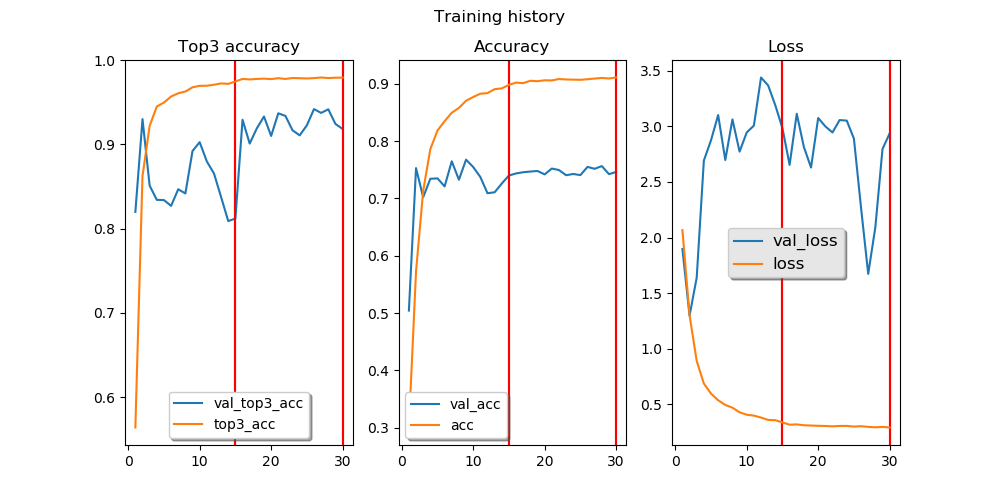

Normalized confusion matrix


<IPython.core.display.Javascript object>


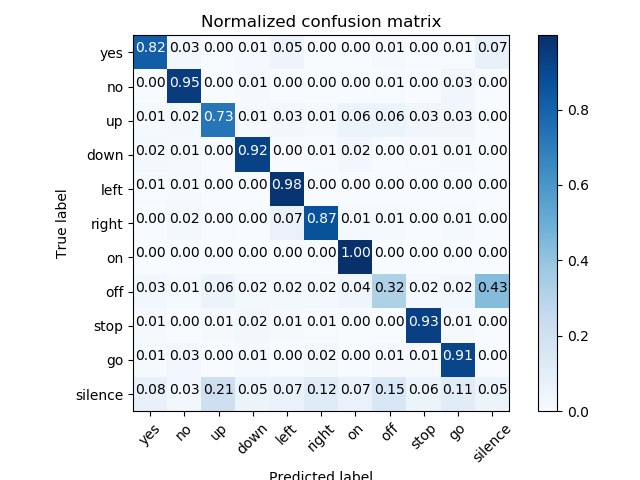

4574/4574 [==============================] - 1s 229us/step
Precision:  73.68 %
Wall time: 7min 14s


In [39]:
%%time
print("MODEL1")
inputData, inputLabel, testData, testLabel, validData, validLabel, augmentedData, augmentedLabel, validation_data, loss_weights = functions.modelSelection('model1', dataset, labels)

cnn = models.model1(inputData,inputLabel)

fittedHistory = []

for count, optimizer in enumerate(optimizers):
    print('Using optimizer number ' + str(count))
    cnn.compile(loss="categorical_crossentropy", optimizer=optimizer, metrics=['accuracy', top3_acc ], loss_weights=loss_weights)
    fittedHistory.append(cnn.fit(inputData, inputLabel,
                         epochs=epochs[count],
                         batch_size=round(inputData.shape[0]/400),
                         shuffle=True,
                         validation_data=validation_data))

functions.plotHistory(epochs, fittedHistory, 'Training History')

preds = cnn.predict(testData)

#Plot normalized confusion matrix
functions.plot_confusion_matrix(preds, testLabel, classes=labelList, normalize=True,
                      title='Normalized confusion matrix')
precision = cnn.evaluate(testData,  testLabel)
print ("Precision: ", round(precision[1]*100,2),"%")

Adding augmented dataset
Using optimizer number 0
Train on 54099 samples, validate on 4203 samples
Epoch 1/15
54099/54099 [==============================] - 26s 483us/step - loss: 1.8557 - acc: 0.3538 - top3_acc: 0.6343 - val_loss: 5.1913 - val_acc: 0.3766 - val_top3_acc: 0.6707
Epoch 2/15
54099/54099 [==============================] - 19s 356us/step - loss: 0.9626 - acc: 0.6808 - top3_acc: 0.9143 - val_loss: 2.3507 - val_acc: 0.6621 - val_top3_acc: 0.9241
Epoch 3/15
54099/54099 [==============================] - 19s 356us/step - loss: 0.6917 - acc: 0.7818 - top3_acc: 0.9463 - val_loss: 3.1739 - val_acc: 0.6798 - val_top3_acc: 0.9348
Epoch 4/15
54099/54099 [==============================] - 19s 356us/step - loss: 0.5747 - acc: 0.8201 - top3_acc: 0.9565 - val_loss: 1.0771 - val_acc: 0.7273 - val_top3_acc: 0.9610
Epoch 5/15
54099/54099 [==============================] - 19s 356us/step - loss: 0.5004 - acc: 0.8433 - top3_acc: 0.9629 - val_loss: 0.9258 - val_acc: 0.7247 - val_top3_acc: 0.9

<IPython.core.display.Javascript object>


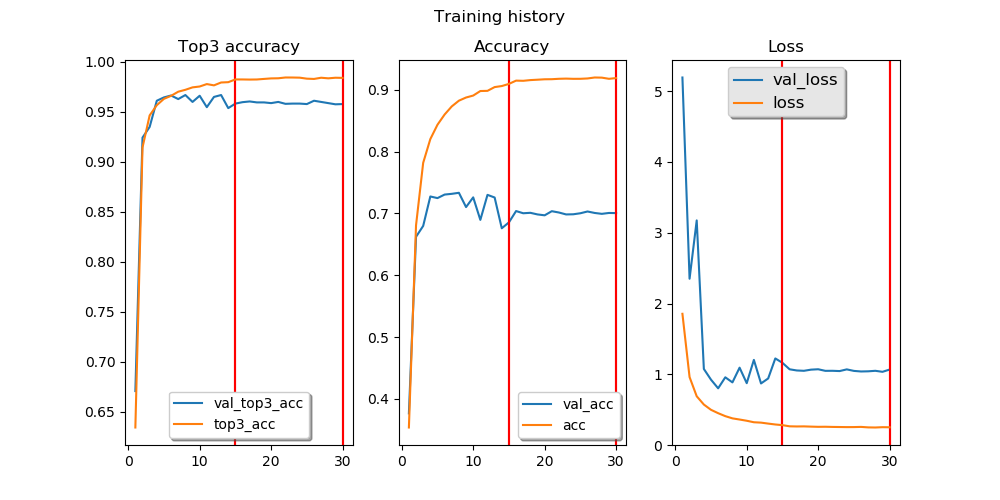

Normalized confusion matrix


<IPython.core.display.Javascript object>


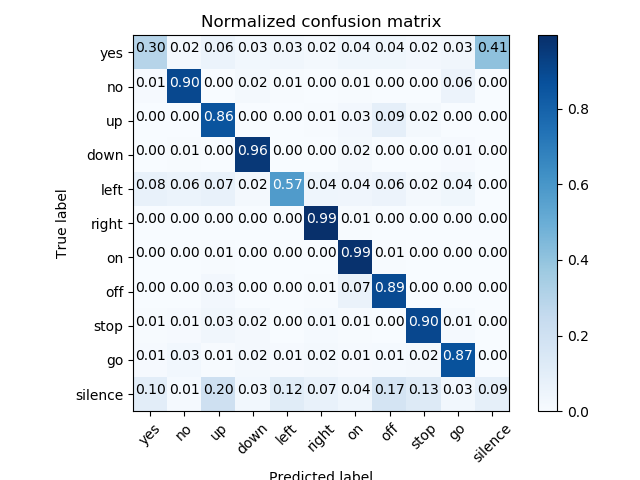

4574/4574 [==============================] - 1s 221us/step
Precision:  69.55 %
Wall time: 9min 50s


In [40]:
%%time
cnn = models.model1(inputData,inputLabel)

print('Adding augmented dataset')
inputData, inputLabel = functions.meltData(inputData, augmentedData, inputLabel, augmentedLabel, 0.7)

fittedHistory = []

for count, optimizer in enumerate(optimizers):
    print('Using optimizer number ' + str(count))
    cnn.compile(loss="categorical_crossentropy", optimizer=optimizer, metrics=['accuracy', top3_acc ], loss_weights=loss_weights)
    fittedHistory.append(cnn.fit(inputData, inputLabel,
                         epochs=epochs[count],
                         batch_size=round(inputData.shape[0]/400),
                         shuffle=True,
                         validation_data=validation_data))
    
functions.plotHistory(epochs, fittedHistory, 'Training History')

preds = cnn.predict(testData)
#Plot normalized confusion matrix
functions.plot_confusion_matrix(preds, testLabel, classes=labelList, normalize=True,
                      title='Normalized confusion matrix')
precision = cnn.evaluate(testData,  testLabel)
print ("Precision: ", round(precision[1]*100,2),"%")

name = 'cnn1.bak'
#cnn.save(dest_directory + name)

## Model2


MODEL2
Using optimizer number 0
Train on 34769 samples, validate on 4203 samples
Epoch 1/15
34769/34769 [==============================] - 36s 1ms/step - loss: 2.1221 - acc: 0.2586 - top3_acc: 0.5046 - val_loss: 1.8299 - val_acc: 0.3866 - val_top3_acc: 0.7214
Epoch 2/15
34769/34769 [==============================] - 29s 836us/step - loss: 1.4336 - acc: 0.4964 - top3_acc: 0.8115 - val_loss: 1.2020 - val_acc: 0.5820 - val_top3_acc: 0.8630
Epoch 3/15
34769/34769 [==============================] - 29s 837us/step - loss: 0.9894 - acc: 0.6634 - top3_acc: 0.9152 - val_loss: 0.8319 - val_acc: 0.7566 - val_top3_acc: 0.9324
Epoch 4/15
34769/34769 [==============================] - 29s 837us/step - loss: 0.8035 - acc: 0.7349 - top3_acc: 0.9342 - val_loss: 0.6779 - val_acc: 0.7940 - val_top3_acc: 0.9481
Epoch 5/15
34769/34769 [==============================] - 29s 837us/step - loss: 0.6827 - acc: 0.7795 - top3_acc: 0.9459 - val_loss: 0.4880 - val_acc: 0.8641 - val_top3_acc: 0.9684
Epoch 6/15
3476

<IPython.core.display.Javascript object>


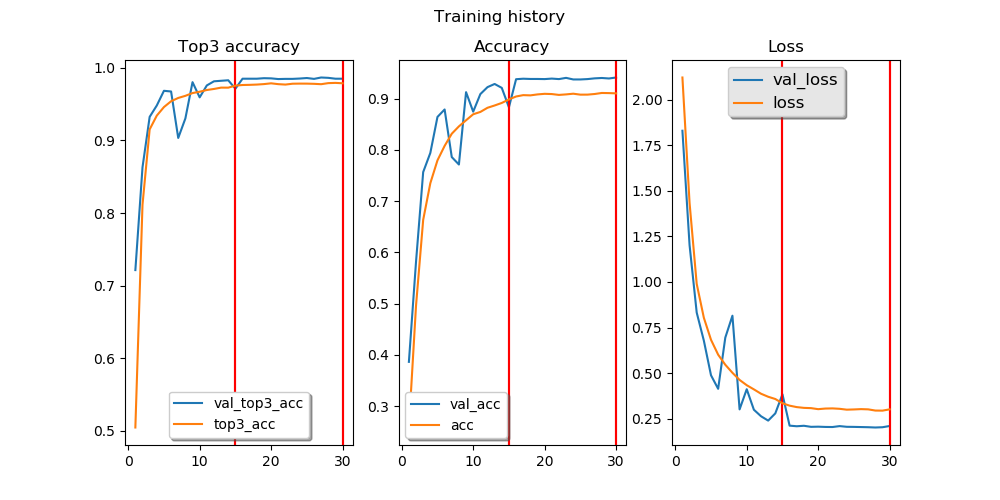

Normalized confusion matrix


<IPython.core.display.Javascript object>


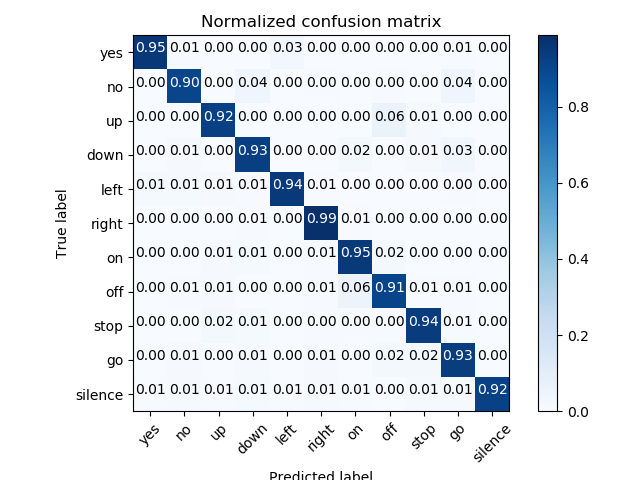

4574/4574 [==============================] - 2s 379us/step
Precision:  93.46 %
Wall time: 14min 49s


In [41]:
%%time
print("\nMODEL2")
inputData, inputLabel, testData, testLabel, validData, validLabel, augmentedData, augmentedLabel, validation_data, loss_weights = functions.modelSelection('model2', dataset, labels)

cnn = models.model2(inputData,inputLabel, baseDim = 40)

fittedHistory = []

for count, optimizer in enumerate(optimizers):
    print('Using optimizer number ' + str(count))
    cnn.compile(loss="categorical_crossentropy", optimizer=optimizer, metrics=['accuracy', top3_acc ], loss_weights=loss_weights)
    fittedHistory.append(cnn.fit(inputData, inputLabel,
                         epochs=epochs[count],
                         batch_size=round(inputData.shape[0]/400),
                         shuffle=True,
                         validation_data=validation_data))

functions.plotHistory(epochs, fittedHistory, 'Training History')

preds = cnn.predict(testData)

#Plot normalized confusion matrix
functions.plot_confusion_matrix(preds, testLabel, classes=labelList, normalize=True,
                      title='Normalized confusion matrix')
precision = cnn.evaluate(testData,  testLabel)
print ("Precision: ", round(precision[1]*100,2),"%")

Adding augmented dataset
Using optimizer number 0
Train on 54099 samples, validate on 4203 samples
Epoch 1/15
54099/54099 [==============================] - 50s 921us/step - loss: 2.2318 - acc: 0.2181 - top3_acc: 0.4450 - val_loss: 1.8694 - val_acc: 0.3902 - val_top3_acc: 0.6698
Epoch 2/15
54099/54099 [==============================] - 42s 783us/step - loss: 1.5718 - acc: 0.4550 - top3_acc: 0.7612 - val_loss: 1.6642 - val_acc: 0.3931 - val_top3_acc: 0.6719
Epoch 3/15
54099/54099 [==============================] - 42s 784us/step - loss: 1.0375 - acc: 0.6496 - top3_acc: 0.9088 - val_loss: 0.9452 - val_acc: 0.6743 - val_top3_acc: 0.8951
Epoch 4/15
54099/54099 [==============================] - 42s 785us/step - loss: 0.8134 - acc: 0.7301 - top3_acc: 0.9355 - val_loss: 0.5448 - val_acc: 0.8506 - val_top3_acc: 0.9669
Epoch 5/15
54099/54099 [==============================] - 42s 784us/step - loss: 0.6900 - acc: 0.7774 - top3_acc: 0.9456 - val_loss: 0.4732 - val_acc: 0.8625 - val_top3_acc: 0.9

<IPython.core.display.Javascript object>


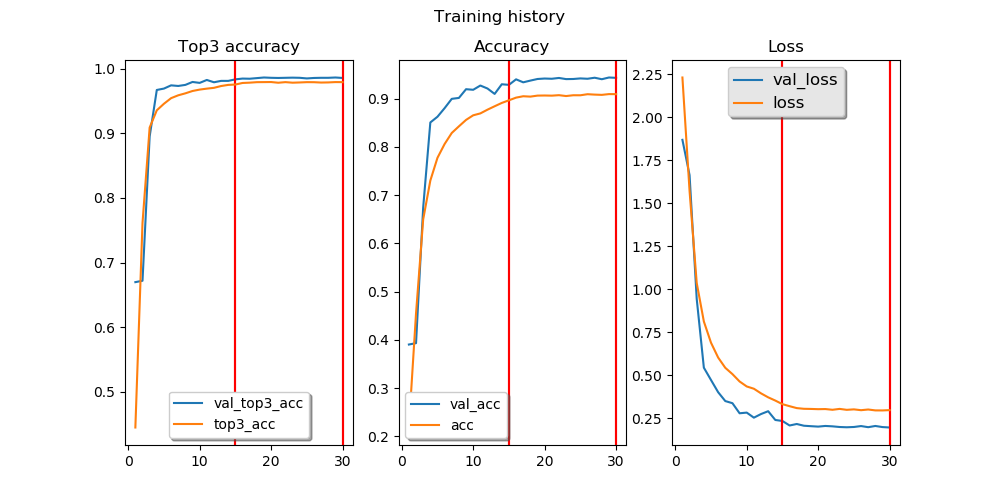

Normalized confusion matrix


<IPython.core.display.Javascript object>


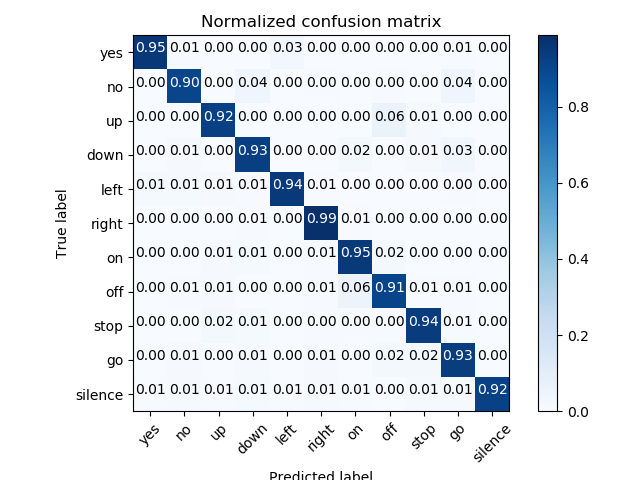

4574/4574 [==============================] - 2s 403us/step
Precision:  93.9 %
Wall time: 21min 24s


In [42]:
%%time
cnn = models.model2(inputData,inputLabel, baseDim = 40)

print('Adding augmented dataset')
inputData, inputLabel = functions.meltData(inputData, augmentedData, inputLabel, augmentedLabel, 0.7)

fittedHistory = []

for count, optimizer in enumerate(optimizers):
    print('Using optimizer number ' + str(count))
    cnn.compile(loss="categorical_crossentropy", optimizer=optimizer, metrics=['accuracy', top3_acc ], loss_weights=loss_weights)
    fittedHistory.append(cnn.fit(inputData, inputLabel,
                         epochs=epochs[count],
                         batch_size=round(inputData.shape[0]/400),
                         shuffle=True,
                         validation_data=validation_data))
    
functions.plotHistory(epochs, fittedHistory, 'Training History')

#Plot normalized confusion matrix
functions.plot_confusion_matrix(preds, testLabel, classes=labelList, normalize=True,
                      title='Normalized confusion matrix')
precision = cnn.evaluate(testData,  testLabel)
print ("Precision: ", round(precision[1]*100,2),"%")
name = 'cnn2.bak'
#cnn.save(dest_directory + name)

## TinyDarknet


TINYDARKNET
Using optimizer number 0
Train on 34769 samples, validate on 4203 samples
Epoch 1/15
34769/34769 [==============================] - 38s 1ms/step - loss: 1.4676 - acc: 0.7152 - top3_acc: 0.8870 - val_loss: 0.4838 - val_acc: 0.8768 - val_top3_acc: 0.9700
Epoch 2/15
34769/34769 [==============================] - 27s 787us/step - loss: 0.4031 - acc: 0.8888 - top3_acc: 0.9739 - val_loss: 0.3534 - val_acc: 0.9063 - val_top3_acc: 0.9776
Epoch 3/15
34769/34769 [==============================] - 27s 787us/step - loss: 0.3108 - acc: 0.9129 - top3_acc: 0.9793 - val_loss: 0.2545 - val_acc: 0.9322 - val_top3_acc: 0.9831
Epoch 4/15
34769/34769 [==============================] - 27s 787us/step - loss: 0.2694 - acc: 0.9253 - top3_acc: 0.9818 - val_loss: 0.2640 - val_acc: 0.9355 - val_top3_acc: 0.9807
Epoch 5/15
34769/34769 [==============================] - 27s 787us/step - loss: 0.2400 - acc: 0.9330 - top3_acc: 0.9849 - val_loss: 0.2177 - val_acc: 0.9384 - val_top3_acc: 0.9831
Epoch 6/15

<IPython.core.display.Javascript object>


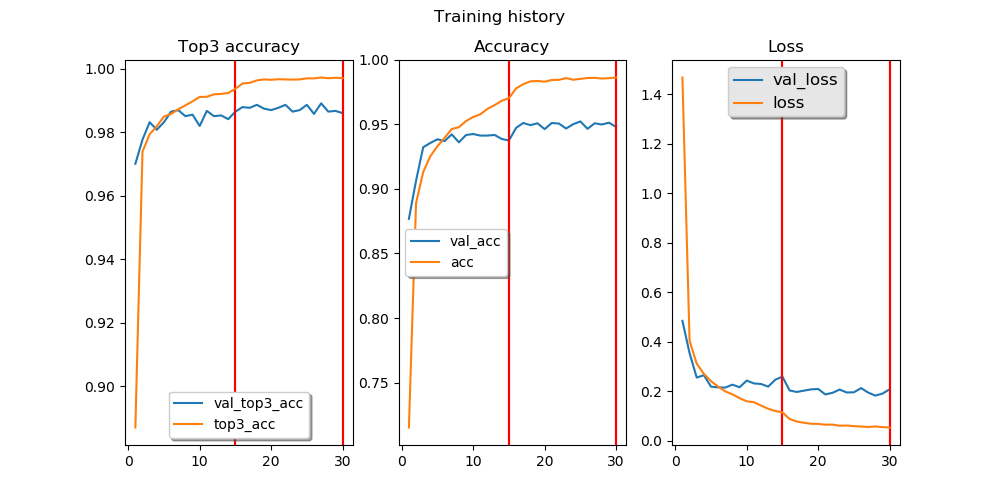

Normalized confusion matrix


<IPython.core.display.Javascript object>


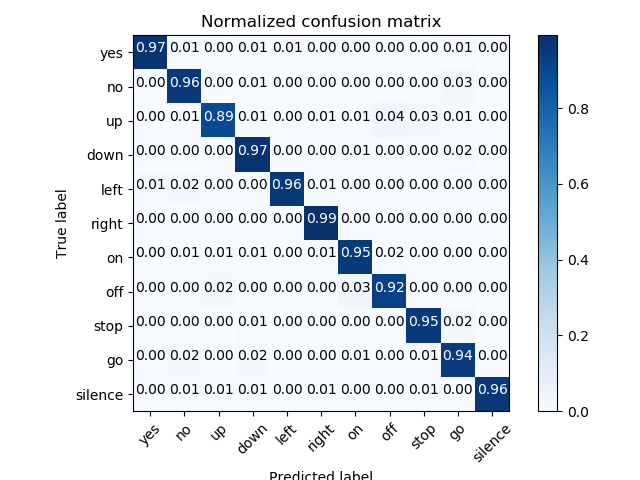

4574/4574 [==============================] - 1s 302us/step
Precision:  95.15 %
Wall time: 13min 50s


In [43]:
%%time
print("\nTINYDARKNET")
inputData, inputLabel, testData, testLabel, validData, validLabel, augmentedData, augmentedLabel, validation_data, loss_weights = functions.modelSelection('tinyDarknet', dataset, labels)

cnn = models.tinyDarknet(inputData,inputLabel, dropout = 0.1)

fittedHistory = []

for count, optimizer in enumerate(optimizers):
    print('Using optimizer number ' + str(count))
    cnn.compile(loss="categorical_crossentropy", optimizer=optimizer, metrics=['accuracy', top3_acc ], loss_weights=loss_weights)
    fittedHistory.append(cnn.fit(inputData, inputLabel,
                         epochs=epochs[count],
                         batch_size=round(inputData.shape[0]/400),
                         shuffle=True,
                         validation_data=validation_data))

functions.plotHistory(epochs, fittedHistory, 'Training History')

preds = cnn.predict(testData)

#Plot normalized confusion matrix
functions.plot_confusion_matrix(preds, testLabel, classes=labelList, normalize=True,
                      title='Normalized confusion matrix')
precision = cnn.evaluate(testData,  testLabel)
print ("Precision: ", round(precision[1]*100,2),"%")

Adding augmented dataset
Using optimizer number 0
Train on 54099 samples, validate on 4203 samples
Epoch 1/15
54099/54099 [==============================] - 49s 898us/step - loss: 1.2466 - acc: 0.7727 - top3_acc: 0.9132 - val_loss: 0.3785 - val_acc: 0.9067 - val_top3_acc: 0.9774
Epoch 2/15
54099/54099 [==============================] - 38s 712us/step - loss: 0.3080 - acc: 0.9155 - top3_acc: 0.9788 - val_loss: 0.2979 - val_acc: 0.9267 - val_top3_acc: 0.9852
Epoch 3/15
54099/54099 [==============================] - 38s 699us/step - loss: 0.2354 - acc: 0.9333 - top3_acc: 0.9836 - val_loss: 0.2539 - val_acc: 0.9346 - val_top3_acc: 0.9864
Epoch 4/15
54099/54099 [==============================] - 38s 699us/step - loss: 0.2027 - acc: 0.9435 - top3_acc: 0.9865 - val_loss: 0.2219 - val_acc: 0.9431 - val_top3_acc: 0.9864
Epoch 5/15
54099/54099 [==============================] - 38s 699us/step - loss: 0.1787 - acc: 0.9504 - top3_acc: 0.9880 - val_loss: 0.2123 - val_acc: 0.9424 - val_top3_acc: 0.9

<IPython.core.display.Javascript object>


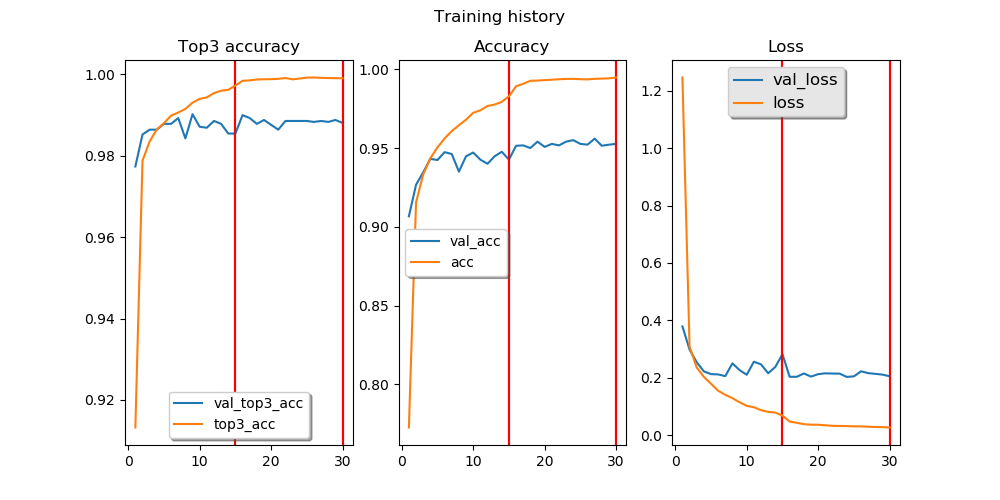

Normalized confusion matrix


<IPython.core.display.Javascript object>


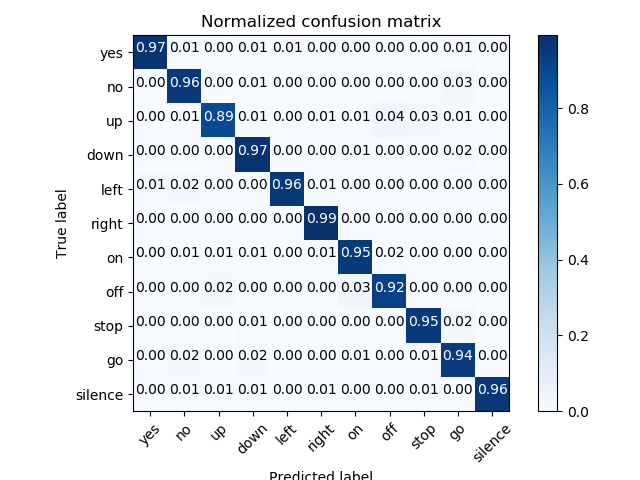

4574/4574 [==============================] - 2s 335us/step
Precision:  95.37 %
Wall time: 19min 11s


In [44]:
%%time
cnn = models.tinyDarknet(inputData,inputLabel, dropout = 0.1)

print('Adding augmented dataset')
inputData, inputLabel = functions.meltData(inputData, augmentedData, inputLabel, augmentedLabel, 0.7)

fittedHistory = []

for count, optimizer in enumerate(optimizers):
    print('Using optimizer number ' + str(count))
    cnn.compile(loss="categorical_crossentropy", optimizer=optimizer, metrics=['accuracy', top3_acc ], loss_weights=loss_weights)
    fittedHistory.append(cnn.fit(inputData, inputLabel,
                         epochs=epochs[count],
                         batch_size=round(inputData.shape[0]/400),
                         shuffle=True,
                         validation_data=validation_data))
    
functions.plotHistory(epochs, fittedHistory, 'Training History')

#Plot normalized confusion matrix
functions.plot_confusion_matrix(preds, testLabel, classes=labelList, normalize=True,
                      title='Normalized confusion matrix')
precision = cnn.evaluate(testData,  testLabel)
print ("Precision: ", round(precision[1]*100,2),"%")

name = 'tinyDarknet.bak'
#cnn.save(dest_directory + name)